# Домашнее задание к занятию 1.3 визуализация данных

## Носова Е. А. 02.07.2017

In [1]:
# https://www.kaggle.com/c/titanic

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Возрастное распределение пассажиров в train выборке (matplotlib)

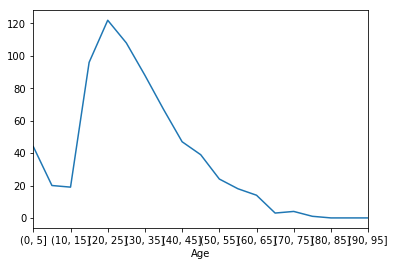

In [5]:
train_by_age = train['Age'].groupby(pd.cut(train['Age'], np.arange(0,100,5))).count()
train_by_age.plot()

Очень похоже на обычную кривую дожития. В Титанике был представлен "срез" популяции, аналогичный генеральной совокупности?

In [6]:
train_by_sex = train.groupby(['Sex', 
                              pd.cut(train['Age'], np.arange(0,100,5))]).count()
#train_by_sex.fillna(0)

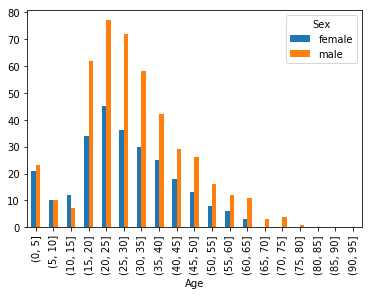

In [7]:
train_by_sex['PassengerId'].unstack(level=0).plot(kind='bar')

Мужчин во всех возрастах больше чем женщин

## 2. Распределения (seaborn)

C:\Users\katty\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


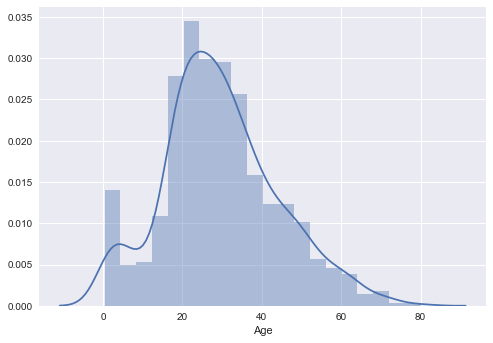

In [8]:
import seaborn as sb
sb.distplot(train['Age'][train['Age']>0])

Почему тут warning?
Возрастное распределение пассажиров похоже на нормальное

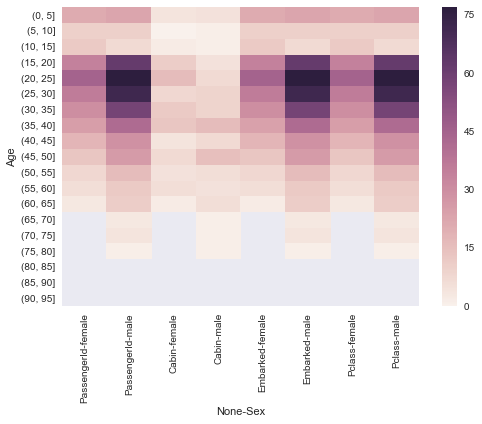

In [10]:
sb.heatmap(train_by_sex[['PassengerId', 'Cabin', 'Embarked', 'Pclass']].unstack(level=0)) 
#у скольких пассажиров в каждой возрастной группе и каждого пола были заполнены поля Cabin, Embarked, Pclass
#PassengerId для сравнения

Поле Cabin заполнено сильно не для всех пассажиров.

## 3. ggplot

In [31]:
import ggplot

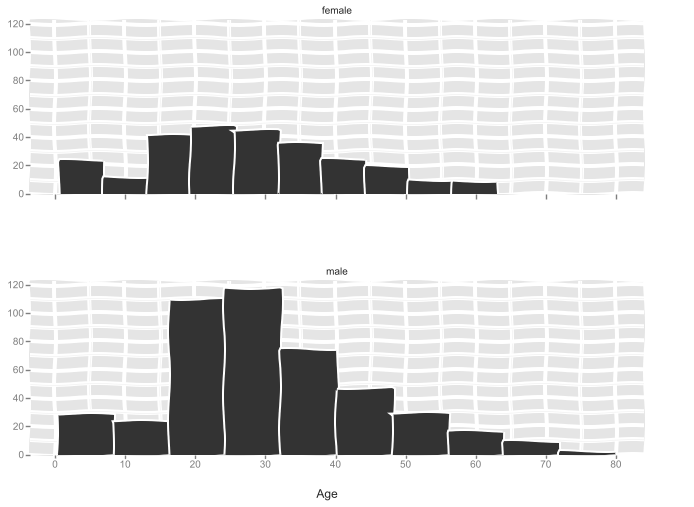

<ggplot: (-9223372036572983559)>

In [40]:
#Распределение мужчин и женщин по возрасту
ggplot.ggplot(ggplot.aes('Age'), data = train) + ggplot.geom_histogram() + ggplot.facet_wrap('Sex')

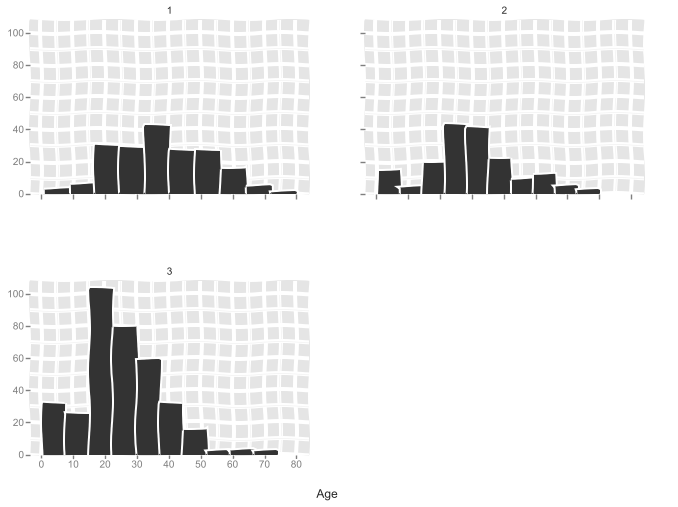

<ggplot: (-9223372036572681514)>

In [41]:
#Распределение пассажиров из разных классов по возрасту
ggplot.ggplot(ggplot.aes('Age'), data = train) + ggplot.geom_histogram() + ggplot.facet_wrap('Pclass')

Больше всего пассажиров ехало 3-м классом и они были молоды. (около 20 лет)
В первом классе возрастое распределение самое равномерное, но все-таки больше было 40-летних.

Учитывая гипотезу о генеральной совокупности, можно предположить, что более состоятельные граждане имели более равномерное возрастное распределение и среди оставшихся на берегу. То есть динамика их популяции меньше зависела от естественных причин?